<a href="https://colab.research.google.com/github/venkateshblks/DataScience-practice/blob/main/Neural_Network/Neural_Network_Back_Propagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy


In [3]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
X


array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [19]:
dataset.shape

(768, 9)

In [6]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8,  activation='relu'))  #init='uniform',
model.add(Dense(8,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [7]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                108       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
dataset.shape

(768, 9)

In [24]:
b=768-(768*0.33)
b/10  #iterations  approx 52

51.455999999999996

In [26]:
# Fit the model
history=model.fit(X, Y, validation_split=0.33,epochs=32, batch_size=10)  #init='uniform',

Epoch 1/32
52/52 [==============================] - 0s 6ms/step - loss: 0.5850 - accuracy: 0.7140 - val_loss: 0.5760 - val_accuracy: 0.6929
Epoch 2/32
52/52 [==============================] - 0s 3ms/step - loss: 0.6212 - accuracy: 0.7023 - val_loss: 0.5882 - val_accuracy: 0.6890
Epoch 3/32
52/52 [==============================] - 0s 3ms/step - loss: 0.5825 - accuracy: 0.7062 - val_loss: 0.7023 - val_accuracy: 0.5827
Epoch 4/32
52/52 [==============================] - 0s 4ms/step - loss: 0.6182 - accuracy: 0.6751 - val_loss: 0.7416 - val_accuracy: 0.5906
Epoch 5/32
52/52 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.6946 - val_loss: 0.6338 - val_accuracy: 0.7087
Epoch 6/32
52/52 [==============================] - 0s 4ms/step - loss: 0.5595 - accuracy: 0.7121 - val_loss: 0.5728 - val_accuracy: 0.6890
Epoch 7/32
52/52 [==============================] - 0s 3ms/step - loss: 0.5511 - accuracy: 0.7121 - val_loss: 0.5802 - val_accuracy: 0.7008
Epoch 8/32
52/52 [==

In [27]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 3ms/step - loss: 0.5406 - accuracy: 0.7135
accuracy: 71.35%


In [28]:
# Visualize training history

# list all data in history
import matplotlib.pyplot as plt
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
history.history

{'loss': [0.5849851965904236,
  0.6212286949157715,
  0.5824820399284363,
  0.6182018518447876,
  0.5810162425041199,
  0.5594837069511414,
  0.5510672926902771,
  0.5542651414871216,
  0.5378578901290894,
  0.5492785573005676,
  0.5569493770599365,
  0.546866774559021,
  0.538124144077301,
  0.5635569095611572,
  0.5462123155593872,
  0.5560482740402222,
  0.561741828918457,
  0.5610307455062866,
  0.5340662598609924,
  0.5491020083427429,
  0.5420550107955933,
  0.563839316368103,
  0.5358814001083374,
  0.5325559377670288,
  0.5328984260559082,
  0.5470142960548401,
  0.5364077091217041,
  0.5383619070053101,
  0.5581340193748474,
  0.557993471622467,
  0.5380017161369324,
  0.5268619656562805],
 'accuracy': [0.7140077948570251,
  0.7023346424102783,
  0.7062256932258606,
  0.6750972867012024,
  0.6945525407791138,
  0.7120622396469116,
  0.7120622396469116,
  0.7140077948570251,
  0.7334630489349365,
  0.7354085445404053,
  0.7081711888313293,
  0.7217898964881897,
  0.719844341278

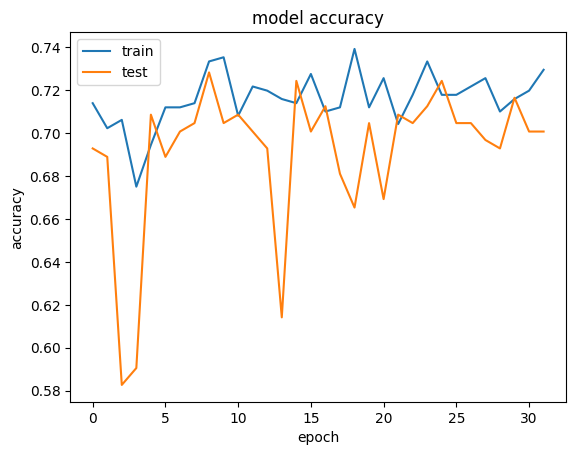

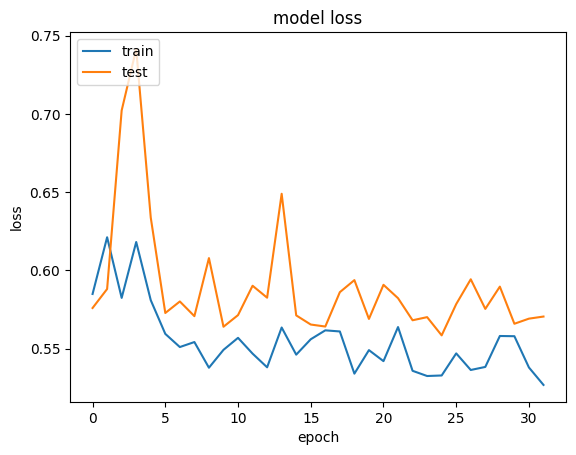

In [29]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
